In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import linear_model
import matplotlib.pyplot as plt

In [3]:
smarket_df = pd.read_csv('../Data/Smarket.csv')
print (smarket_df.head())
print (smarket_df.describe())

   Year   Lag1   Lag2   Lag3   Lag4   Lag5  Volume  Today Direction
0  2001  0.381 -0.192 -2.624 -1.055  5.010  1.1913  0.959        Up
1  2001  0.959  0.381 -0.192 -2.624 -1.055  1.2965  1.032        Up
2  2001  1.032  0.959  0.381 -0.192 -2.624  1.4112 -0.623      Down
3  2001 -0.623  1.032  0.959  0.381 -0.192  1.2760  0.614        Up
4  2001  0.614 -0.623  1.032  0.959  0.381  1.2057  0.213        Up
              Year         Lag1         Lag2         Lag3         Lag4  \
count  1250.000000  1250.000000  1250.000000  1250.000000  1250.000000   
mean   2003.016000     0.003834     0.003919     0.001716     0.001636   
std       1.409018     1.136299     1.136280     1.138703     1.138774   
min    2001.000000    -4.922000    -4.922000    -4.922000    -4.922000   
25%    2002.000000    -0.639500    -0.639500    -0.640000    -0.640000   
50%    2003.000000     0.039000     0.039000     0.038500     0.038500   
75%    2004.000000     0.596750     0.596750     0.596750     0.596750   


In [5]:
### Direction ~ Log{1,2,3,4,5} + Volume

### use statsmodels.formula: y can be 0/1; y cannot be Up/Down or True/False
smarket_df['isUp'] = [1 if x == 'Up' else 0 for x in smarket_df['Direction']]
###smf_mod = smf.logit(formula = "Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume", data=smarket_df) ### this one does not work
smf_mod = smf.logit(formula = "isUp ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume", data=smarket_df) ### this one works 
smf_fit = smf_mod.fit()
smf_pred = smf_fit.predict(smarket_df[['Lag1','Lag2','Lag3','Lag4','Lag5','Volume']])
print ('statsmodels.formula')
print (smf_fit.summary())

### use statsmodels: y can be 0/1 or True/False; y cannot be Up/Down
x = pd.DataFrame(smarket_df[['Lag1','Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']])
x = sm.add_constant(x)
##y = pd.DataFrame(smarket_df[['Direction']]) ### this one does not work
y = pd.DataFrame(smarket_df[['Direction']])=='Up'### this one works
### use statsmodels.GLM
sm_mod1 = sm.GLM(y, x, family = sm.families.Binomial())
sm_fit1 = sm_mod1.fit()
sm_pred1 = sm_fit1.predict(x)
print ('statsmodels:glm, family=Binomial')
print (sm_fit1.summary())
### use statsmodels.Logit
sm_mod2 = sm.Logit(y, x)
sm_fit2 = sm_mod2.fit()
sm_pred2 = sm_fit2.predict(x)
print ('statsmodels:logit')
print (sm_fit2.summary())

''' results from glm
Call:
glm(formula = Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + 
    Volume, family = "binomial", data = Smarket)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.446  -1.203   1.065   1.145   1.326  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)
(Intercept) -0.126000   0.240736  -0.523    0.601
Lag1        -0.073074   0.050167  -1.457    0.145
Lag2        -0.042301   0.050086  -0.845    0.398
Lag3         0.011085   0.049939   0.222    0.824
Lag4         0.009359   0.049974   0.187    0.851
Lag5         0.010313   0.049511   0.208    0.835
Volume       0.135441   0.158360   0.855    0.392

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1731.2  on 1249  degrees of freedom
Residual deviance: 1727.6  on 1243  degrees of freedom
AIC: 1741.6

Number of Fisher Scoring iterations: 3
'''

Optimization terminated successfully.
         Current function value: 0.691034
         Iterations 4
statsmodels.formula
                           Logit Regression Results                           
Dep. Variable:                   isUp   No. Observations:                 1250
Model:                          Logit   Df Residuals:                     1243
Method:                           MLE   Df Model:                            6
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                0.002074
Time:                        22:55:15   Log-Likelihood:                -863.79
converged:                       True   LL-Null:                       -865.59
                                        LLR p-value:                    0.7319
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1260      0.241     -0.523      0.601      -0.598       0.346
Lag1     

' results from glm\nCall:\nglm(formula = Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + \n    Volume, family = "binomial", data = Smarket)\n\nDeviance Residuals: \n   Min      1Q  Median      3Q     Max  \n-1.446  -1.203   1.065   1.145   1.326  \n\nCoefficients:\n             Estimate Std. Error z value Pr(>|z|)\n(Intercept) -0.126000   0.240736  -0.523    0.601\nLag1        -0.073074   0.050167  -1.457    0.145\nLag2        -0.042301   0.050086  -0.845    0.398\nLag3         0.011085   0.049939   0.222    0.824\nLag4         0.009359   0.049974   0.187    0.851\nLag5         0.010313   0.049511   0.208    0.835\nVolume       0.135441   0.158360   0.855    0.392\n\n(Dispersion parameter for binomial family taken to be 1)\n\n    Null deviance: 1731.2  on 1249  degrees of freedom\nResidual deviance: 1727.6  on 1243  degrees of freedom\nAIC: 1741.6\n\nNumber of Fisher Scoring iterations: 3\n'

In [6]:
### function to compute the false_positive and true_positive curve
def myROC(prob, y, n=1000):
    prob = pd.Series(prob)
    y = pd.Series(y)
    thresh_seq = np.linspace(0, 1, num=n)
    fp_seq = np.zeros(n)
    tp_seq = np.zeros(n)
    for i in range(n):
        thresh = thresh_seq[i]
        fp_seq[i] = np.sum((y==0) & (prob > thresh))/(1.0*np.sum(y==0))
        tp_seq[i] = np.sum((y==1) & (prob > thresh))/(1.0*np.sum(y==1))
    return fp_seq, tp_seq

In [ ]:
### be careful of the difference between ['isUp'] and [['isUp']]
smarket_df['isUp'] = [1 if x == 'Up' else 0 for x in smarket_df['Direction']]
print (smarket_df['isUp'].shape)
print (smarket_df[['isUp']].shape)
### pd.Series(smarket_df['isUp']) is ok
### pd.Series(smarket_df[['isUp']]) is wrong

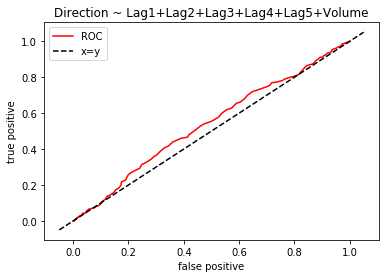

In [88]:
y01 = pd.Series([1 if x == 'Up' else 0 for x in smarket_df['Direction']])
fp, tp = myROC(smf_pred, y01, n=1000)
fig, ax = plt.subplots()
ax.plot(fp, tp, 'r-', label='ROC')
ax.set_xlabel('false positive')
ax.set_ylabel('true positive')
ax.set_title('Direction ~ Lag1+Lag2+Lag3+Lag4+Lag5+Volume')
ax.plot([-0.05, 1.05], [-0.05, 1.05], 'k--', label='x=y')
ax.legend()

In [99]:
### use training data to fit model
train = smarket_df['Year'] < 2005
smf_mod_train = smf.logit(formula = "isUp ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume", data=smarket_df.loc[train,:])
smf_fit_train = smf_mod_train.fit()
smf_pred_all = smf_fit_train.predict(smarket_df[['Lag1','Lag2','Lag3','Lag4','Lag5','Volume']])
print ('statsmodels.formula')
print (smf_fit_train.summary())

Optimization terminated successfully.
         Current function value: 0.691936
         Iterations 4
statsmodels.formula
                           Logit Regression Results                           
Dep. Variable:                   isUp   No. Observations:                  998
Model:                          Logit   Df Residuals:                      991
Method:                           MLE   Df Model:                            6
Date:                Sun, 21 Oct 2018   Pseudo R-squ.:                0.001562
Time:                        19:47:51   Log-Likelihood:                -690.55
converged:                       True   LL-Null:                       -691.63
                                        LLR p-value:                    0.9044
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1912      0.334      0.573      0.567      -0.463       0.845
Lag1     

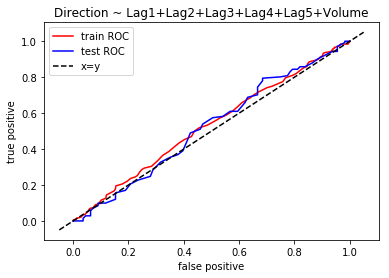

In [102]:
### plot ROC for training and testing data
y01 = pd.Series([1 if x == 'Up' else 0 for x in smarket_df['Direction']])
fp_train, tp_train = myROC(smf_pred_all[train], y01[train], n=1000)
fp_test, tp_test = myROC(smf_pred_all[~train], y01[~train], n=1000)

fig, ax = plt.subplots()
ax.plot(fp_train, tp_train, 'r-', label='train ROC')
ax.plot(fp_test, tp_test, 'b-', label='test ROC')
ax.plot([-0.05, 1.05], [-0.05, 1.05], 'k--', label='x=y')
ax.set_title('Direction ~ Lag1+Lag2+Lag3+Lag4+Lag5+Volume')
ax.set_xlabel('false positive')
ax.set_ylabel('true positive')
ax.legend()

In [124]:
print ('training')
tmp_train = pd.DataFrame({'Predicted':['Up' if x > 0.5 else 'Down' for x in smf_pred_all[train]], 
                          'Truth':smarket_df.loc[train, 'Direction']})
print (pd.crosstab(tmp_train['Predicted'], tmp_train['Truth'], margins=True))

print ('\ntest')
tmp_test = pd.DataFrame({'Predicted':['Up' if x > 0.5 else 'Down' for x in smf_pred_all[~train]], 
                          'Truth':smarket_df.loc[~train, 'Direction']})
print (pd.crosstab(tmp_test['Predicted'], tmp_test['Truth'], margins=True))

''' from R table
> table(ifelse(prob_pred[train] > 0.5, "Up", "Down"), Smarket$Direction[train])
       Down  Up
  Down  175 156
  Up    316 351
  
> table(ifelse(prob_pred[!train] > 0.5, "Up", "Down"), Smarket$Direction[!train])    
       Down Up
  Down   77 97
  Up     34 44
'''

training
Truth      Down   Up  All
Predicted                
Down        175  156  331
Up          316  351  667
All         491  507  998

test
Truth      Down   Up  All
Predicted                
Down         77   97  174
Up           34   44   78
All         111  141  252


' from R table\n> table(ifelse(prob_pred[train] > 0.5, "Up", "Down"), Smarket$Direction[train])\n      \n       Down  Up\n  Down  175 156\n  Up    316 351\n> table(ifelse(prob_pred[!train] > 0.5, "Up", "Down"), Smarket$Direction[!train])\n      \n       Down Up\n  Down   77 97\n  Up     34 44\n'